In [1]:
# 기본 환경 로드
%run ./env.ipynb

# Exploratory Data Analysis

예제 프로젝트 이므로 수집된 데이터에 아주 간단한 EDA 를 진행해봅니다.

데이터에 대한 샘플 이미지 출력과 레이블의 분포를 보겠습니다.

In [2]:
from utils import *

sdate = get_env_sdate(default = "2018070108")
path_base = get_env_path_base(default = "/root/mnt/dfs/notebooks-skp/mnist")
path_data = get_env_path_date(default = "/root/mnt/dfs/data/mnist")

print("sdate: {}".format(sdate))
print("path_base: {}".format(path_base))
print("path_data: {}".format(path_data))

sdate: 2018070108
path_base: /root/mnt/dfs/notebooks-skp/mnist
path_data: /root/mnt/dfs/data/mnist


In [3]:
# 데이터 로드
import os
from sklearn.externals import joblib 

path_raw = os.path.join(path_data, "raw")
path_raw_sdate = os.path.join(path_raw, sdate)

path_train_xs = os.path.join(path_raw_sdate, "train_xs.pkl")
path_train_ys = os.path.join(path_raw_sdate, "train_ys.pkl")
np_train_xs = joblib.load(path_train_xs)
np_train_ys = joblib.load(path_train_ys)

path_test_xs = os.path.join(path_raw_sdate, "test_xs.pkl")
path_test_ys = os.path.join(path_raw_sdate, "test_ys.pkl")
np_test_xs = joblib.load(path_test_xs)
np_test_ys = joblib.load(path_test_ys)

print(np_train_xs.shape, np_train_ys.shape)
print(np_test_xs.shape, np_test_ys.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


labels: [7, 2, 1, 0, 4, 9, 5]


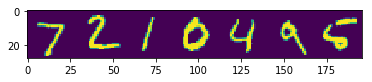

In [4]:
# 샘플 이미지 출력
w = np_test_xs.shape[1]
h = np_test_xs.shape[2]
images = []
labels = []
for i in range(9):
    if np_test_ys[i] in labels:
        continue
        
    images.append(np_test_xs[i].reshape(w, h))
    labels.append(np_test_ys[i])
        
image = np.concatenate(images, axis=1)
plt.imshow(image)
print("labels: {}".format(labels))

In [5]:
import imageio

# 추후 API 테스트에 사용할 목적으로 이미지를 저장해봅니다.
for i in range(len(images)):
    imageio.imwrite("./tests/{}.jpg".format(labels[i]), images[i])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

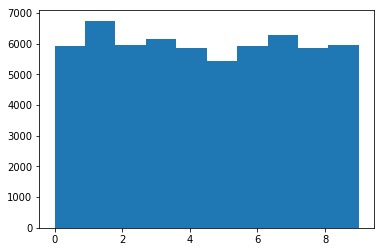

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

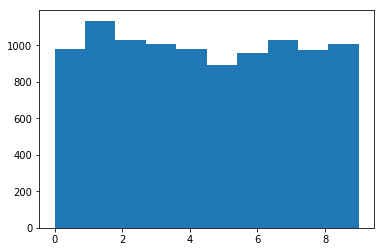

In [6]:
# 레이블 데이터 분포 확인
plt.hist(np_train_ys)
plt.show()
plt.hist(np_test_ys)
plt.show()